# Docker
Tradotto/Riassunto da: https://devopswithdocker.com/

## Definizioni e concetti di base

### Introduzione
Docker è un tool di tipo PaaS (Platform as a Service), che utilizza la virtualizzazione a livello di sistema operativo per effettuare la delivery di software, in pacchetti chiamati container.
Quindi:
1.	Docker è un insieme di strumenti utilizzati per la delivery di software in containers
2.	I container sono pacchetti di software
Tali container sono isolati in modo da non interferire con altro software in esecuzione sulla macchina. Inoltre, Docker offre degli strumenti per permettere ai container di interagire gli uni con gli altri.

### I benefici dei container
#### Scenario 1: "It works on my machine"
Quello che succede spesso negli ambienti di sviluppo che non fanno uso di containerizzazione, è che uno sviluppatore lavora ad un software, lo esegue ed è perfettamente funzionante e probabilmente esegue anche la pipeline di test senza problemi. Quando però il software viene deployato in produzione, non funziona. In questi casi, l’unico modo di risolvere il problema è indagare sulle differenze tra l’ambiente di produzione e quello dello sviluppatore il cui computer è stato in grado di eseguire correttamente il programma.
I container risolvono questo problema fornendo un ambiente isolato e ben definito, completo di dipendenze, in cui il software può essere eseguito.
#### Scenario 2: Ambienti isolati
Supponiamo di dover rilasciare cinque diverse applicazioni Python 3, in un server sul quale è già in esecuzione un’applicazione in Python 2.7. 
Dato che i container impacchettano l’applicazione con tutte le sue dipendenze, ognuna delle applicazioni potrà essere eseguita all’interno del suo ambiente con le sue rispettive dipendenze, senza però impattare le altre.
#### Scenario 3: Sviluppo
Supponiamo di iniziare a lavorare ad una webapp preesistente, la quale utilizza altri servizi come Postgres, MongoDB e altri. Installare e mantenere tutte queste dipendenze per lo sviluppo in locale può essere molto complicato e stressante.
Grazie alla containerizzazione, è possibile eseguire ognuna di queste dipendenze in un container senza problemi.
#### Scenario 4: Scaling
Avviare e fermare un Docker container è semplice. Ma eseguire applicazioni con richiesta variabile, come Netflix o Facebook, è più complicato. Per questo esistono degli strumenti di container orchestration che permettono di distribuire il carico tra più repliche dello stesso container. Se una applicazione non è più disponibile, il tool di orchestration dividerà il traffico tra le istanze ancora in esecuzione, e nel frattempo avvierà un nuovo container per sostituire quello venuto meno.

### Macchine virtuali
Le macchine virtuali differiscono dalle tecniche di containerizzazione, in quanto è presente uno strato aggiuntivo nell’architettura:
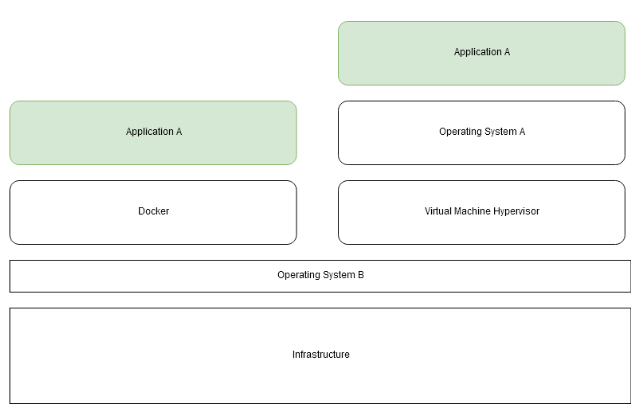
Infatti, eseguire del software su un container è quasi altrettanto efficiente come eseguirlo nativamente sul sistema operativo. I container hanno accesso diretto al kernel del sistema operativo e alle sue risorse, minimizzando così l’overhead.

### Eseguire i container
Per eseguire un container, viene usato il comando

`
docker container run container-name
`

o la sua forma abbreviata

`
docker run container-name
`

Se l'**immagine** non è disponibile nella memoria locale, verrà ricercata e scaricata dal docker-hub, altrimenti verrà direttamente eseguita.

In [5]:
!docker container run hello-world


Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (amd64)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For more examples and ideas, visit:
 https://docs.docker.com/get-started/



Unable to find image 'hello-world:latest' locally
latest: Pulling from library/hello-world
c1ec31eb5944: Pulling fs layer
c1ec31eb5944: Verifying Checksum
c1ec31eb5944: Download complete
c1ec31eb5944: Pull complete
Digest: sha256:1408fec50309afee38f3535383f5b09419e6dc0925bc69891e79d84cc4cdcec6
Status: Downloaded newer image for hello-world:latest


In [6]:
!docker run hello-world


Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (amd64)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For more examples and ideas, visit:
 https://docs.docker.com/get-started/



### Immagini e container
I container sono istanze delle immagini. 
Una metafora valida per questo concetto è la seguente. Un container è come un piatto pronto da mangiare, mentre un'immagine è la ricetta. Così come servono la ricetta e gli ingredienti per preparare il piatto, per preparare ed eseguire il container servono l'immagine e un container runtime (Docker engine). 
L'immagine fornisce tutte le istruzioni e le dipendenze necessarie per eseguire il container.

#### File immagine
Una immagine Docker è un file non modificabile. Per creare una nuova immagine, si parte da una immagine già esistente e vi si aggiungono dei layer aggiuntivi.
Le immagini sono quindi *immutabili*, e non possono essere modificate dopo la creazione.
Per elencare le immagini disponibili in locale, viene usato il comando `docker image ls`.

In [7]:
!docker image ls

REPOSITORY    TAG       IMAGE ID       CREATED         SIZE
hello-world   latest    d2c94e258dcb   15 months ago   13.3kB


I container vengono creati a partire dalle immagini, quindi eseguendo due volte hello-world abbiamo scaricato una immagine e creato due container.
I file immagine vemgono costruiti da un file di istruzioni chiamato **Dockerfile**, il cui parsing viene effettuato usando il comando `docker image build`.
Il Dockerfile è chiamato di default *Dockerfile* (hehe), ed è fatto così:
```dockerfile
FROM <image>:<tag>

RUN <install some dependencies>

CMD <command that is executed on `docker container run`>
```

Tornando alla metafora sulla cucina, un Dockerfile è quindi una ricetta per un file immagine, il quale è la ricetta per un container.

#### Container
I container contengono lo stretto indispensabile per l'esecuzione di una applicazione, ed è possibile avviarli, fermarli ed interagirvi. Sono ambienti **isolati** nella macchina host, in grado di interagire gli uni con gli altri e con la macchina host stessa tramite TCP/UDP.
E' possibile elencare i container attualmente in esecuzione con il comando `docker container ls`

In [9]:
!docker container ls

CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES


Usando la flag `-a` verranno mostrati anche quelli già terminati.

In [11]:
!docker container ls -a

CONTAINER ID   IMAGE         COMMAND    CREATED          STATUS                      PORTS     NAMES
bd8dc6ecdf7b   hello-world   "/hello"   18 minutes ago   Exited (0) 11 minutes ago             stoic_brattain
40eb27846766   hello-world   "/hello"   25 minutes ago   Exited (0) 18 minutes ago             sharp_kalam


Il comando `docker container ls` è anche utilizzabile nella forma abbreviata `docker ps`.

In [5]:
!docker ps -a

CONTAINER ID   IMAGE         COMMAND    CREATED          STATUS                      PORTS     NAMES
7d00eb27f7aa   hello-world   "/hello"   19 seconds ago   Exited (0) 17 seconds ago             stupefied_agnesi
bd8dc6ecdf7b   hello-world   "/hello"   31 hours ago     Exited (0) 31 hours ago               stoic_brattain
40eb27846766   hello-world   "/hello"   31 hours ago     Exited (0) 31 hours ago               sharp_kalam


### Basi della Doccker Command Line Interface (CLI)
Il "Docker Engine" è formato da tre parti: la CLI, una RESTI API e il Docker daemon. Quando eseguiamo un comando come quelli già visti, il client usa la REST API per inviare una richiesta al Docker daemon, il quale si occupa di immagini, container ed altre risorse.
Nella [documentazione della cli](https://docs.docker.com/engine/reference/commandline/cli/) sono elencati più di 50 comandi, tra i quali il già visto `docker container run <image>`.
Dato che non ci serve più, proviamo a rimuovere l'immagine *hello-world*.

In [7]:
!docker image rm hello-world

Error response from daemon: conflict: unable to remove repository reference "hello-world" (must force) - container bd8dc6ecdf7b is using its referenced image d2c94e258dcb


Il messaggio di errore mostrato ci informa che un container creato tramite l'immagine *hello-world* è ancora esistente, quindi rimuoverla potrebbe avere delle conseguenze. Prima di rimuovere una immagine, dovremmo quindi rimuovere i container che vi fanno riferimento.
Verifichiamo nuovamente quali sono i container esistenti.

In [8]:
!docker container ls -a

CONTAINER ID   IMAGE         COMMAND    CREATED          STATUS                      PORTS     NAMES
7d00eb27f7aa   hello-world   "/hello"   13 minutes ago   Exited (0) 13 minutes ago             stupefied_agnesi
bd8dc6ecdf7b   hello-world   "/hello"   31 hours ago     Exited (0) 31 hours ago               stoic_brattain
40eb27846766   hello-world   "/hello"   31 hours ago     Exited (0) 31 hours ago               sharp_kalam


Si noti che i container hanno un *CONTAINER_ID* e un *NAME*. I nomi sono attualmente autogenerati. Quando abbiamo diversi container, possiamo usare grep (o altre utility simily) per filtrare la lista:

In [12]:
!docker container ls -a | findstr hello-world

7d00eb27f7aa   hello-world   "/hello"   17 minutes ago   Exited (0) 17 minutes ago             stupefied_agnesi
bd8dc6ecdf7b   hello-world   "/hello"   31 hours ago     Exited (0) 31 hours ago               stoic_brattain
40eb27846766   hello-world   "/hello"   31 hours ago     Exited (0) 31 hours ago               sharp_kalam


Possiamo eliminare i container con il comando `docker container rm`, che accetta il nome o l'id di un container come argomento. Si noti che il comando funziona anche con alcuni caratteri iniziali di un ID. Per esempio, se l'ID di un container è 3d4bafb314ba2, possiamo rimuoverlo con il comando `docker container rm 3d`. Se tuttavia dovessero esserci più container il cui ID inizia con la stessa stringa, nessuno dei due verrebe eliminato, mostrando invece un warning. E' anche possibile specificare più argomenti: `docker container rm id1 id2 id3`.
Nel caso in cui ci fossero parecchi container non in esecuzione, e li volessimo cancellare tutti, possiamo usare `docker container prune`.
Dopo aver rimosso tutti i container dell'immagine *hello-world*, possiamo rimuoverla usando `docker image rm hello-world`.
Per scaricare un'immagine senza eseguirla, possiamo usare `docker image pull <nome-immagine>`.
Proviamo ad avviare un nuovo container:

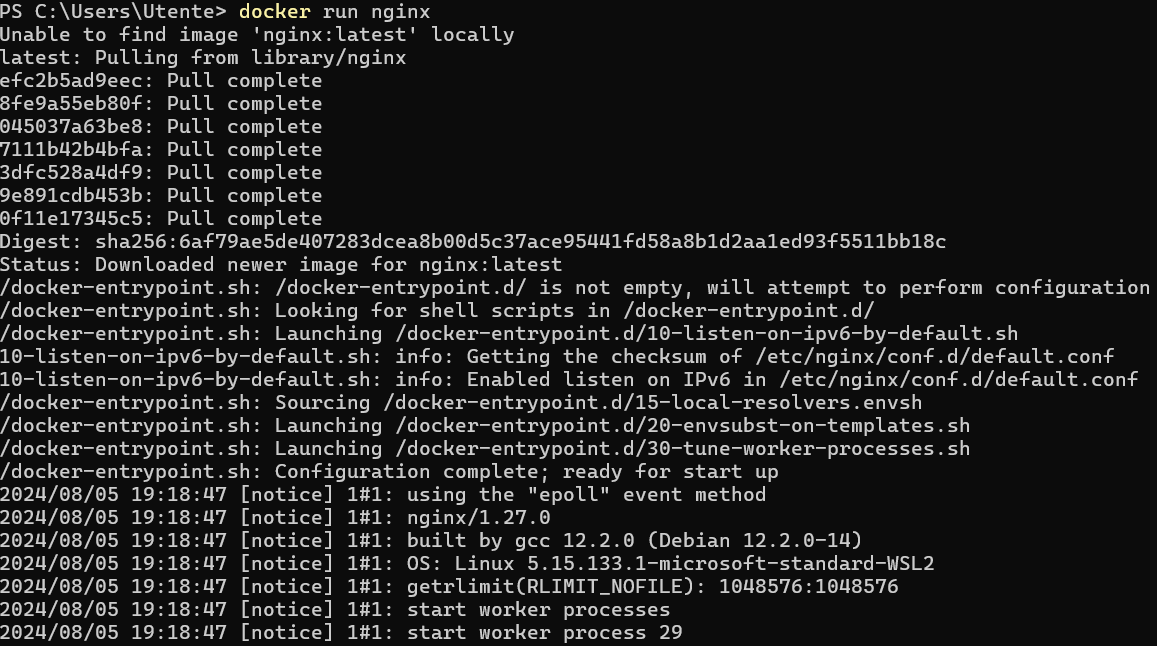 (il comando è stato eseguito in una shell esterna in quanto la cella su JupyterLab sarebbe rimasta perennemente in esecuzione senza mostrare alcun output)

Dopo avere scaricato l'immagine ed avviato il container, la CLI sembra rimanere bloccata. Questo accade perché il container in questione viene eseguito nel terminale attualmente attivo, bloccando l'input. E' possibile verificarlo in un altro terminale usando `docker container ls`.

In [26]:
!docker container ls

CONTAINER ID   IMAGE     COMMAND                  CREATED          STATUS          PORTS     NAMES
3465a462e8f2   nginx     "/docker-entrypoint.â€¦"   10 minutes ago   Up 10 minutes   80/tcp    determined_noyce


Possiamo fermare il container nel terminale bloccato premendo CTRL+C, e rieseguire il comando in modalità per avviare il container con la flag `-d`, cioè "detached" (in background).

In [29]:
!docker run -d nginx

05b33d8ba1b0fb3f7d86f2a8d6ef2dff3b6e8b3d61494601950ade1daab88b69


In [31]:
!docker ps

CONTAINER ID   IMAGE     COMMAND                  CREATED              STATUS              PORTS     NAMES
05b33d8ba1b0   nginx     "/docker-entrypoint.â€¦"   About a minute ago   Up About a minute   80/tcp    goofy_gauss


Per rimuovere container o immagini, possiamo usare il nome piuttosto che l'ID. Se però adesso proviamo ad eliminare il container, il comando fallirà:

In [32]:
!docker container rm goofy_gauss

Error response from daemon: You cannot remove a running container 05b33d8ba1b0fb3f7d86f2a8d6ef2dff3b6e8b3d61494601950ade1daab88b69. Stop the container before attempting removal or force remove


Per eliminare un container, dobbiamo prima fermarlo:

In [34]:
!docker container stop goofy_gauss

goofy_gauss


In [35]:
!docker container rm goofy_gauss

goofy_gauss


E' anche possibile forzare la rimozione di un container in esecuzione usando la flag `--force`: `docker container rm --force <nome-container>`.

### Comand più utilizzati
| **comando** | **spiegazione** | **shorthand** |
--- | --- | --- |
| `docker image ls` | Elenca tutte le immagini | `docker images` |
| `docker image rm` | Rimuove una immagine | `docker rmi` |
| `docker image pull <image>` | Scarica una immagine dal docker registry | `docker pull <image>` |
| `docker container ls -a` | Elenca tutti i container | `docker ps -a` |
| `docker container run <image>` | Esegue un container a partire da una immagine | `docker run <image>` |
| `docker container rm <container>` | Elimina un container | ` docker rm <container> ` |
| `docker container stop <container>` | Arresta un container | `docker stop` |
| `docker container exec <container> <command>` | Esegue un comando all'interno del container | `docker exec <container> <command>` |

Per tutti i comandi precedenti, il container può essere specificato sia con il nome che con l'ID.


### Esercizi 1.1 - 1.2
#### Esercizio 1.1: Primi passi
* Avviare tre container da una immagine che non ritorna automaticamente (come nginx) in modalità detached.
* Fermare due dei container e lasciarne un altro in esecuzione.
* Verificare che l'output di `docker ps -a` mostri due container arrestati ed uno in esecuzione.
#### Esercizio 1.2: Pulizia
Abbiamo dei container e una immagine non più in uso che occupano spazio. Eseguire `docker ps -a` e `docker image ls` dovrebbe confermare questa ipotesi.
* Ripulire il Docker daemon rimuovendo tutte le immagini e i container.
* Verificare il risultato usando `docker ps -a` e `docker image ls`.
